In [ ]:
pip install scikit-learn mglearn numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Automobile.csv')

df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [ ]:
df = df.dropna()
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0,1
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,mpfi,131,...,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0,1
10,16430.0,29,23,5800.0,101.0,8.8,2.80,3.50,mpfi,108,...,101.2,front,rwd,sedan,2.0,std,gas,bmw,192.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [ ]:
object_type = ['fuel-system','engine-type','engine-location','drive-wheels','body-style','aspiration','fuel-type','make']

le = LabelEncoder()
for i in object_type:
    df.loc[: ,i] = le.fit_transform(df[i])

In [ ]:
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,4,109,...,99.8,0,1,3,4.0,0,1,0,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,4,136,...,99.4,0,0,3,4.0,0,1,0,164.0,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,4,136,...,105.8,0,1,3,4.0,0,1,0,158.0,1
8,23875.0,20,17,5500.0,140.0,8.3,3.40,3.13,4,131,...,105.8,0,1,3,4.0,1,1,0,158.0,1
10,16430.0,29,23,5800.0,101.0,8.8,2.80,3.50,4,108,...,101.2,0,2,3,2.0,0,1,1,192.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,4,141,...,109.1,0,2,3,4.0,0,1,17,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,4,141,...,109.1,0,2,3,4.0,1,1,17,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,4,173,...,109.1,0,2,3,4.0,0,1,17,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,2,145,...,109.1,0,2,3,4.0,1,0,17,95.0,-1


In [ ]:
y = df['symboling']
X = df.drop(columns=['symboling'])
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_train= pd.DataFrame(X_train, columns=X.columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

#MODEL LINEAR

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MSE: 0.4858863257584879
RMSE: 0.6970554682078665
R^2: 0.6689636742670049


In [ ]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (32, 25)
Shape of y_test: (32,)


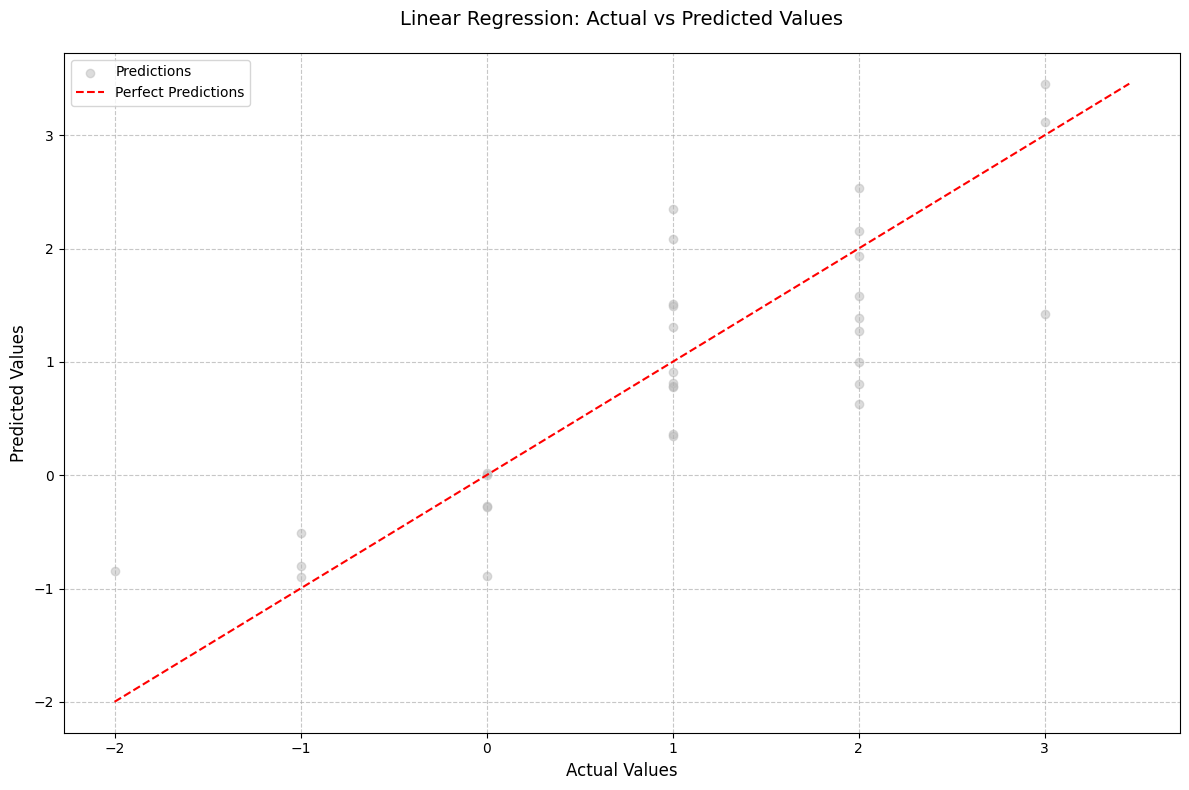

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

plt.scatter(y_test, y_pred, color='#bbbbbb', alpha=0.5, label='Predictions')

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Predictions')

plt.title('Linear Regression: Actual vs Predicted Values', fontsize=14, pad=20)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Linear Regression
*   Metode untuk memodelkan hubungan antara variabel independen
* Rumus umum linear regression adalah:



$$
y = b_0 + b_1 X + \epsilon
$$

Di mana:  
- $y$ = Variabel dependen (target)  
- $X$ = Variabel independen (fitur)  
- $b_0$ = Intercept (nilai $y$ saat $X = 0$)  
- $b_1$ = Koefisien
- $\epsilon$ = Error (residual)

# Evaluasi Model

##**Mean Squared Error (MSE):**
MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual $y$ dan nilai prediksi $\hat{y}$.

  $$
  MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
  $$

Di mana:  
- $y_i$ = Nilai aktual (data sebenarnya)  
- $\hat{y}_i$ = Nilai prediksi dari model  
- $n$ = Jumlah sampel  

##**Root Mean Squared Error (RMSE):**
RMSE adalah akar kuadrat dari MSE, sehingga unitnya sama dengan unit target.
  $$
  RMSE = \sqrt{MSE}
  $$

##**R-squared (\( R^2 \)):**
$R^2$ mengukur seberapa baik model menjelaskan variabilitas data. Nilainya antara **0 dan 1**, semakin mendekati **1** semakin bagus. Jika nilainya lebih kecil dari 0, maka model lebih buruk daripada rata-rata.

  $$
  R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
  $$

Kak, maaf saya udah nyoba pake mglearn tapi error mulu gak tahu juga kenapa :(